# Nivell 1:
## Exercici 1:
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
df = pd.read_csv( "DelayedFlights.csv", index_col=[0])
df

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


    + Una variable categòrica (UniqueCarrier)
    
    Podem veure que existeix molta diversitat de número de vols per a cada aereolínia, però la WN  té una quantitat de vols 
    molt superior a la mitja.
    
    La gràfica de barres está executada amb matplotlib i seaborn.

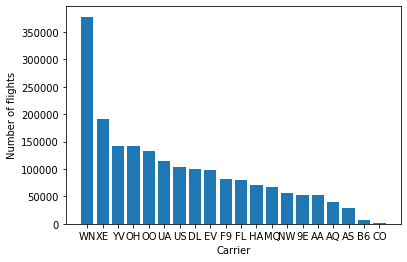

In [10]:
x_values = df['UniqueCarrier'].unique()
y_values = df['UniqueCarrier'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.xlabel("Carrier")
plt.ylabel("Number of flights")
plt.savefig('VarCat.png')
plt.show()

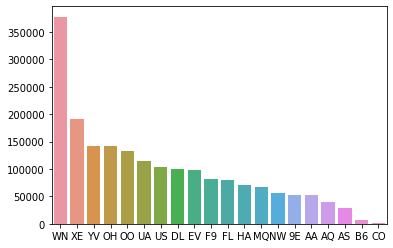

In [5]:
#sns.set_theme(style="whitegrid")
x_values = df['UniqueCarrier'].unique()
y_values = df['UniqueCarrier'].value_counts().tolist()
ax = sns.barplot(x=x_values, y=y_values, data=df)

    + Una variable numèrica (ArrDelay)
    
    En aquesta gràfica veurem la frecuencia en els retards de l'arribada. veiem que la majoria dels retards en l'arribada 
    son de 5000 o menys, sent els retards superiors poc frecuents.
    
    L'histograma está executat amb matplotlib i seaborn.

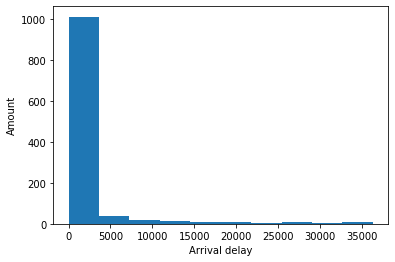

In [16]:
plt.hist(df["ArrDelay"].value_counts().tolist())
plt.xlabel("Arrival delay")
plt.ylabel("Amount")
plt.savefig('VarNum.png')
plt.show() 

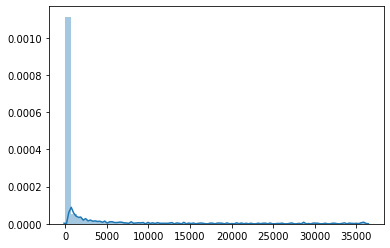

In [8]:
x_values = df["ArrDelay"].value_counts().tolist()
sns.distplot(x_values)

    + Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    
    En aquesta gràfica podem veure la quantitat de retard mitjà en l'arribada per a cada aerolinia.
    
    La gràfica de abrres está executada en matplotlib i seaborn.

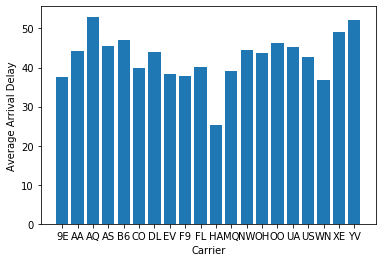

In [9]:
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
md = df.groupby('sortedCarrier').sum()['ArrDelay']/df.groupby('sortedCarrier').count()['ArrDelay']
carrier = sorted(df['UniqueCarrier'].unique())
#print(md)
#print(carrier)
plt.bar(carrier, md)
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.savefig('VarNumiCat.png')
plt.show()



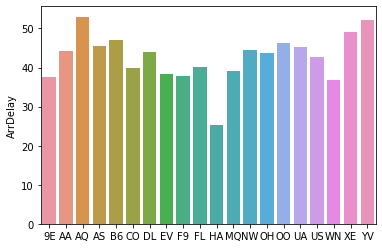

In [9]:
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
x_values = sorted(df['UniqueCarrier'].unique())
y_values = df.groupby('sortedCarrier').sum()['ArrDelay']/df.groupby('sortedCarrier').count()['ArrDelay']
ax = sns.barplot(x=x_values, y=y_values, data=df) 

    + Dues variables numèriques (ArrDelay i DepDelay)
    
    En aquesta gràfica podem veure la relació que hi ha entre el retard en l'arribada i en la sortida. Podem concloure que 
    hi ha força relació entre aquestes dues variables, doncs a mes retard a la sortida més retard en l'arribada del vol. 
    veiem que hi ha un retard en l'arribada molt més gran quan mes gran sigui el retard en la sortida, mentres que quan hi 
    ha poc o cap retard en la sortida succeeix el mateix amb el retard en l'arribada.

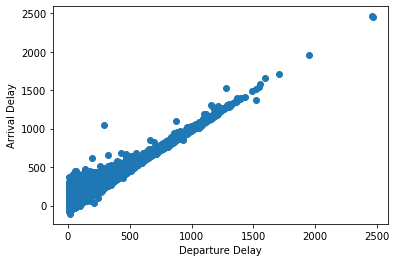

In [5]:
plt.scatter(df['DepDelay'], df['ArrDelay'])
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.savefig('DosVarNum.png')
plt.show()


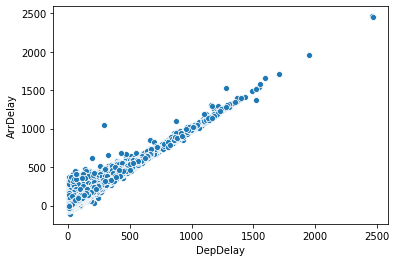

In [4]:
sns.scatterplot(x="DepDelay", y="ArrDelay", data=df)
plt.show()

    + Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    
    en aquesta gràfica veurem la relació entre el retard total de cada aerolinina, que es calcula restant el retard en
    l'arribada del retard en la sortida. de manera que veurem quines aerolinies acumulen mes o menys retard.
    l'histograma està executat en matplotlib i seaborn.

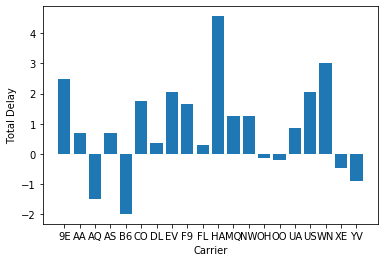

In [13]:
#print("depDelay",df["DepDelay"],"/n")
#print("ArrDelay",df["ArrDelay"])
#print("avDelay: ",(df["DepDelay"]+df["ArrDelay"])/2)
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
td = df.groupby('sortedCarrier').sum()['DepDelay']-df.groupby('sortedCarrier').sum()['ArrDelay']
md = td/df.groupby('sortedCarrier').count()['UniqueCarrier']
carrier = sorted(df['UniqueCarrier'].unique())
plt.bar(carrier, md)
plt.xlabel("Carrier")
plt.ylabel("Total Delay")
plt.savefig('TresVar.png')
plt.show()



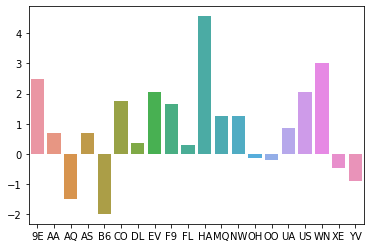

In [15]:
df["sortedCarrier"] = sorted(df['UniqueCarrier'])
td = df.groupby('sortedCarrier').sum()['DepDelay']-df.groupby('sortedCarrier').sum()['ArrDelay']
x_values = sorted(df['UniqueCarrier'].unique())
y_values = td/df.groupby('sortedCarrier').count()['UniqueCarrier']
ax = sns.barplot(x=x_values, y=y_values, data=df) 

    + Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
    
    en aquesta gràfica veurem la relació entre el retard total de cada aerolinina, que ja hem calcualt a l'exercici previ,
    i el temps total de vol per a cada aerolinia. a la gràfica veiem que en general, amb algunes exepcions, a mes temps de 
    vol mes retard acumulen.

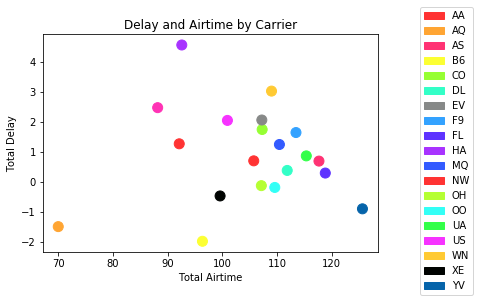

In [4]:
"""print("depDelay: ","\n",df["DepDelay"],"\n")
print("ArrDelay: ","\n",df["ArrDelay"],"\n")
print("Airtime: ","\n",df["AirTime"])"""

df["sortedCarrier"] = sorted(df['UniqueCarrier'])
td = df.groupby('sortedCarrier').sum()['DepDelay']-df.groupby('sortedCarrier').sum()['ArrDelay']
md = td/df.groupby('sortedCarrier').count()['UniqueCarrier']

tt = df.groupby('sortedCarrier').sum()['AirTime']
mt = tt/df.groupby('sortedCarrier').count()['UniqueCarrier']



colors = ["#FF33B5","#FF3333","#FFA533","#FF3374","#FCFF33","#96FF33","#33FFC7","#878988","#33A2FF",
                   "#5E33FF","#A833FF","#335BFF","#FF3333","#B5FF33",
                   "#33FFF6","#33FF49", "#F633FF","#FFCA33","#000301","#0664AA"]
plt.xlabel("Total Airtime")
plt.ylabel("Total Delay")
carrier = sorted(df['UniqueCarrier'].unique())
i=0
for x in carrier:
    globals()[f"handler{i}"] = mpatches.Patch(color=colors[i], label=carrier[i])
    i=i+1
 
plt.legend(handles=[handler1,handler2,handler3,handler4,handler5,handler6,handler7,handler8,handler9,
                    handler10,handler11,handler12,handler13,handler14,handler15,handler16,handler17,
                    handler18,handler19], loc="upper right", bbox_to_anchor=(0.8, 0.65, 0.5, 0.5))
plt.scatter(mt, md, c=colors, s=100)
plt.title('Delay and Airtime by Carrier')
plt.savefig('MesTresVar.png')
plt.show()





## - Exercici 2:
Exporta els gràfics com imatges o com html.

Els gràfics estan exportats com a imatges en l'exercici anterior.

## - Exercici 3:

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

en aquest dos primers gràfics veiem l'histograma de la frecuencia tant de la distancia com del temps de vol.

En la gràfica executada en Seaborn podem veure que hi ha una relació directe entre la distancia i el temps de vols. a més distància més temps de vol i a l'inrevés.

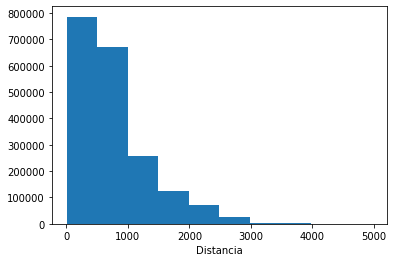

In [12]:
x = df["Distance"]
plt.hist(x)
plt.xlabel("Distancia")
plt.show() 

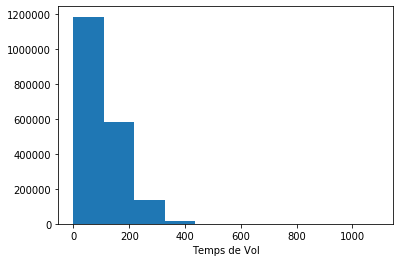

In [13]:
x = df["AirTime"]
plt.hist(x)
plt.xlabel("Temps de Vol")
plt.show() 

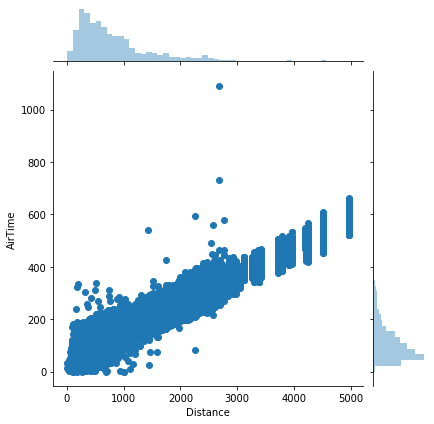

In [22]:
sns.jointplot(data=df, x="Distance", y="AirTime")

En la següent gràfica veiem l'histograma amb la frecuencia de la velocitat dels vols. He filtrat tots els vols que tinguessin un temps de vol 0, doncs donaven velocitat infinita a l'hora de calcular-la, i en ser nomes 7 d'un total de gairebé dos millions de registres, no son representatius. D'igual manera he fet l'histograma amb velocitats per sota dels 1000 km/hora, doncs velocitats superiors son poc realistes, doncs la velocitat mitja dels vols comercials no arriven als 1000 km/hora.

Veiem que la velocitat que es dona amb més frecuencia està al voltant dels 400 km/hora.

l'histograma està executat en matplotlib i seaborn.

Text(0.5, 0, 'Velocitat (km/h)')

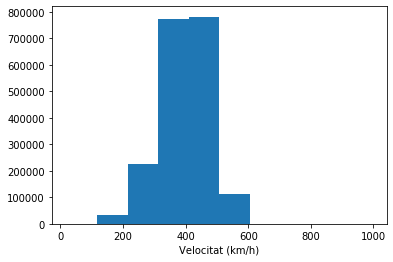

In [28]:
df["velocitat"] = df["Distance"]/(df["AirTime"][df["AirTime"] > 0]/60)
plt.hist(df["velocitat"][df["velocitat"] < 1000])
plt.xlabel("Velocitat (km/h)")

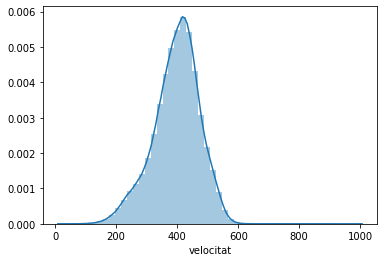

In [25]:
df["velocitat"] = df["Distance"]/(df["AirTime"][df["AirTime"] > 0]/60)
#print(df["velocitat"] )
#plt.hist(total.unique())
#plt.xlabel("Velocitat Mitjana")
#plt.show() 
#print(df[df["AirTime"] == 0])
#print(df["velocitat"][df["velocitat"] > 1000])
sns.distplot(df["velocitat"][df["velocitat"] < 1000] , hist=True, kde=True )

En la següent gràfica veiem el percentatge de vols total amb i sense retard. I comprovem que els vols amb retard son una mica més nombrosos que els que no tenen retard.

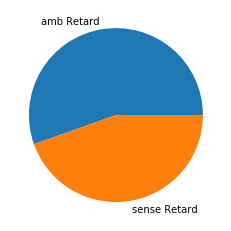

In [62]:
retardSi = df[df['LateAircraftDelay'] > 0.0]['LateAircraftDelay'].count()
retardNo = df[df['LateAircraftDelay'] == 0.0]['LateAircraftDelay'].count()
total = retardSi+retardNo
ambRetard = (retardSi/total)*100
senseRetard = (retardNo/total)*100
y = np.array([ambRetard, senseRetard])
mylabels = ["amb Retard", "sense Retard"]
plt.pie(y, labels = mylabels)
plt.show() 

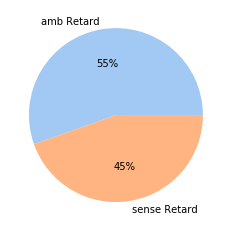

In [24]:
retardSi = df[df['LateAircraftDelay'] > 0.0]['LateAircraftDelay'].count()
retardNo = df[df['LateAircraftDelay'] == 0.0]['LateAircraftDelay'].count()
total = retardSi+retardNo
ambRetard = (retardSi/total)*100
senseRetard = (retardNo/total)*100
y = np.array([ambRetard, senseRetard])
mylabels = ["amb Retard", "sense Retard"]
colors = sns.color_palette('pastel')[0:5]
plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show() 